In [1]:
print('Hello World')

Hello World


In [7]:
# Import a library
# Libraries are code that other people have written so you don't have to.
# If you have anaconda installed, pandas should already be installed.
# Otherwise, use pip (or install anaconda or talk to naitian)

# first way: import entire library
import seaborn
# second way: import entire library, but rename it to something different
import pandas as pd
# third way: import specific thing from library
from matplotlib import pyplot as plt

In [9]:
# Seaborn is a plotting utility that integrates with matplotlib to make
# nicer looking plots
# seaborn.set just initializes seaborn with all the default settings
seaborn.set()

In [10]:
# load a data csv file into pandas
df = pd.read_csv("../data/ic2018_ay.csv")

In [15]:
# show first n rows
n = 5
df.head(n)

,UNITID,XTUIT1,TUITION1,XFEE1,FEE1,XHRCHG1,HRCHG1,XTUIT2,TUITION2,XFEE2,...,XCHG8AY3,CHG8AY3,XCHG9AY0,CHG9AY0,XCHG9AY1,CHG9AY1,XCHG9AY2,CHG9AY2,XCHG9AY3,CHG9AY3
0,100654,R,8610,R,1134,R,287,R,8610,R,...,R,2990,R,3790,R,3090,R,2580,R,2990
1,100663,R,8568,R,0,R,357,R,8568,R,...,R,4886,R,4886,R,4886,R,4886,R,4886
2,100690,R,9000,R,900,R,450,R,9000,R,...,R,1600,R,1500,R,1600,R,1600,R,1600
3,100706,R,9730,R,984,R,427,R,9730,R,...,R,3808,R,4508,R,3578,R,3697,R,3808
4,100724,R,8328,R,2740,R,347,R,8328,R,...,R,4228,R,4228,R,4228,R,4228,R,4228


In [20]:
# look at a single column:

df['TUITION1']

0        8610
1        8568
2        9000
3        9730
4        8328
        ...  
4120        .
4121    18900
4122     6048
4123    10224
4124     4320
Name: TUITION1, Length: 4125, dtype: object

In [21]:
# filter by a condition
# gives us the table, except without all the rows where TUITION1 = .
filtered_df = df[ df['TUITION1'] != '.' ]

`df[ df['TUITION1'] != '.' ]` is basically `df[ [True, False, False, False, True, True, False, ...] ]`

In [26]:
df['TUITION1'] != '.'

0        True
1        True
2        True
3        True
4        True
        ...  
4120    False
4121     True
4122     True
4123     True
4124     True
Name: TUITION1, Length: 4125, dtype: bool

In [24]:
# descriptive statistics
filtered_df['TUITION1'].describe()  # this gives us discrete descriptive stats because its type is string

# convert to integers and do descriptive stats
filtered_df['TUITION1'].astype(int).describe()

count     3806.000000
mean     14765.096427
std      13320.992632
min          0.000000
25%       4471.750000
50%      10434.000000
75%      20091.250000
max      62400.000000
Name: TUITION1, dtype: float64

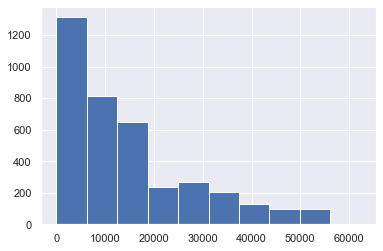

In [25]:
filtered_df['TUITION1'].astype(int).hist()

In [31]:
filtered_df.shape

(3806, 235)

In [39]:
# You can combine filters
# This filter is kind of meaningless, but it demonstrates how to do this
# Note, we use & and |, not and and or because we're doing a binary operation
# the two lists of truth values.

new_filtered_df = df[ (df['TUITION1'] != '.') | (df['FEE1'] == '.') ]

# shape gives us (rows, cols)
# you can remember that rows come before columns with RC Cola
new_filtered_df.shape

(4125, 235)

In [43]:
# ignore this encoding argument for now (or google it)
dir_info = pd.read_csv("../data/hd2018.csv", encoding="LATIN1")

In [44]:
dir_info.head()

,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,...,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",...,-2,26620,1,290,-2,1089,Madison County,105,-86.568502,34.783368
1,100663,University of Alabama at Birmingham,,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,...,101050,13820,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697
2,100690,Amridge University,Southern Christian University |Regions University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,Michael C.Turner,...,-2,33860,1,-2,-2,1101,Montgomery County,102,-86.174010,32.362609
3,100706,University of Alabama in Huntsville,UAH |University of Alabama Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,5,Robert A. Altenkirch,...,101050,26620,1,290,-2,1089,Madison County,105,-86.640449,34.724557
4,100724,Alabama State University,,915 S Jackson Street,Montgomery,AL,36104-0271,1,5,Quinton T. Ross,...,-2,33860,1,-2,-2,1101,Montgomery County,107,-86.295677,32.364317


In [46]:
merged = df.merge(dir_info, on="UNITID")

In [47]:
merged.shape

(4125, 305)

In [64]:
list(merged.keys())

['UNITID',
 'XTUIT1',
 'TUITION1',
 'XFEE1',
 'FEE1',
 'XHRCHG1',
 'HRCHG1',
 'XTUIT2',
 'TUITION2',
 'XFEE2',
 'FEE2',
 'XHRCHG2',
 'HRCHG2',
 'XTUIT3',
 'TUITION3',
 'XFEE3',
 'FEE3',
 'XHRCHG3',
 'HRCHG3',
 'XTUIT5',
 'TUITION5',
 'XFEE5',
 'FEE5',
 'XHRCHG5',
 'HRCHG5',
 'XTUIT6',
 'TUITION6',
 'XFEE6',
 'FEE6',
 'XHRCHG6',
 'HRCHG6',
 'XTUIT7',
 'TUITION7',
 'XFEE7',
 'FEE7',
 'XHRCHG7',
 'HRCHG7',
 'XISPRO1',
 'ISPROF1',
 'XISPFE1',
 'ISPFEE1',
 'XOSPRO1',
 'OSPROF1',
 'XOSPFE1',
 'OSPFEE1',
 'XISPRO2',
 'ISPROF2',
 'XISPFE2',
 'ISPFEE2',
 'XOSPRO2',
 'OSPROF2',
 'XOSPFE2',
 'OSPFEE2',
 'XISPRO3',
 'ISPROF3',
 'XISPFE3',
 'ISPFEE3',
 'XOSPRO3',
 'OSPROF3',
 'XOSPFE3',
 'OSPFEE3',
 'XISPRO4',
 'ISPROF4',
 'XISPFE4',
 'ISPFEE4',
 'XOSPRO4',
 'OSPROF4',
 'XOSPFE4',
 'OSPFEE4',
 'XISPRO5',
 'ISPROF5',
 'XISPFE5',
 'ISPFEE5',
 'XOSPRO5',
 'OSPROF5',
 'XOSPFE5',
 'OSPFEE5',
 'XISPRO6',
 'ISPROF6',
 'XISPFE6',
 'ISPFEE6',
 'XOSPRO6',
 'OSPROF6',
 'XOSPFE6',
 'OSPFEE6',
 'XISPRO7',
 'ISP

Merged has 305 columns:
    That's 235 from df and 71 from dir_info minus 1 overlapping UNITID

In [50]:
filtered_df = merged[ merged['TUITION1'] != '.' ]

In [58]:
filtered_df.loc[filtered_df['TUITION1'].astype(int).argmax()]['INSTNM']

/Users/hannahcoles/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


'MGH Institute of Health Professions'

# git instructions

To push your changes, there are three steps:

1. Add the files you changed (this is known as "staging" your files): `git add <filename>`
2. Commit the changes: `git commit -m "<commit message>"`
3. Push the commit: `git push`

To pull changes:
1. Pull the changes: `git pull`

Troubleshooting when pushing:
1. "Permission denied" when pushing. Message @naitian to get added to the github org
2. Something about upstream changes and needing to pull before you push: you should pull before you push

Troubleshooting when pulling:
1. Merge conflict: if there is a merge conflict, you may need to resolve it. Open the file with conflicts and delete the unwanted code and keep only the code you want.
2. Something about stashing or committing your changes. This means you made a change to a file that you are now trying to pull down and update -- git doesn't want to overwrite your files, so it's asking you to either stash them (basically get rid of any local changes you made) or commit them (so that it can try to resolve any conflicts). You should stash or commit before trying to pull again.